### Принятие решений в бизнесе

<br><b>Описание проекта </b></br>
<br>Цель:</br>
<br>Увеличение выручки интернет магазина.</br>
<br>Предстоит изучить:</br>
<br>1)Приоритезировать гипотезы</br>
<br>2)Запустить A/B-тест </br>
<br>3)Проанализировать результаты</br>


<b>Подготовка и проверка данных</b> 

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
# Открываем датасет orders
orders = pd.read_csv('/datasets/orders.csv',sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [3]:
# Открываем датасет visitors
visitors = pd.read_csv('/datasets/visitors.csv',sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.info()
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
# Проверяем датасет на наилчие дубликатов 
display(orders.duplicated().sum())

0

In [5]:
# Проверяем датасет на наилчие пропусков
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [6]:
# Проверяем датасет на наилчие дубликатов 
visitors.duplicated().sum()

0

In [7]:
# Проверяем датасет на наилчие пропусков
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Согласно подготовки данных, в датасетах нет дубликатов и пропусков, так же практически все столбцы имеют верный тип данных. Единственные изменения понадобились колонкам с датами, их мы привели к единому формату и типу datetime.

<b>Приоритизация гипотез.</b>

In [8]:
#Читаем датасет с результатами A/B теста 
hypothesis = pd.read_csv('/datasets/hypothesis.csv')  

In [9]:
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [10]:
#Для удобства анализа, имена колонок приводим к нижнему регистру  
hypothesis.columns = hypothesis.columns.str.lower()

In [11]:
#Добавляем столбец с приоритезацией по методу ICE к датасету с результатами А/В теста
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts'])

In [12]:
#Выводим датасет с результатами.
hypothesis.sort_values(by='ICE',ascending=False).head(5)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000


ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач. Согласно таблице наиболее приритетные гипотезы под номерами 8,0,7. Но спешить и выбирать данные гипотезы для проверки не стоит нужно посмотреть на модифицированный метод приоритезации RICE.

In [13]:
#Добавляем столбец с приоритезацией по методу RICE к датасету с результатами А/В теста
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts'])

In [52]:
#Выводим датасет с результатами.
pd.options.display.max_colwidth = 120
hypothesis.sort_values(by='RICE',ascending=False).head(5)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


Если обратить внимание на метод ICE, то можно выделить гипотезы под номерами 8,0,7. А в методике RICE, лидирующие позиции занимают гипотезы под номерами 7,2,0. В данном случае изменение произошло всвязи с ключевой метрикой reach, в методе RICE. Он равен 10 и 8 у 7 и 2 гипотезы. Важно обращать внимание не только на силу гипотезы но и на количество пользователей которых она затронет. В данном случае приоритетные гипотезы будут под номерами 2,0,7.
Reach — параметр указывает на то какое количество пользователей затронит изменение, которое захотим внести.

<b>Анализ A/B-теста</b>

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [16]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x:orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : 'nunique',
'visitorId' : 'nunique',
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [17]:
#получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [19]:
#Выводим датасет с агригированными комулятивными значениями 
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


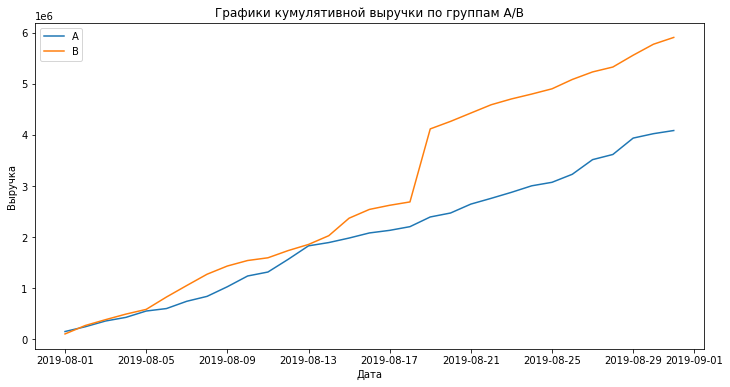

In [20]:
# датафрейм с кумулятивной выручкой в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A']

# датафрейм с кумулятивной выручкой в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B']
# Задаём размер графика 
plt.figure(figsize=(12,6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend() 
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. Однако по графику видно что в некоторых точках выручка группы В резко растёт. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

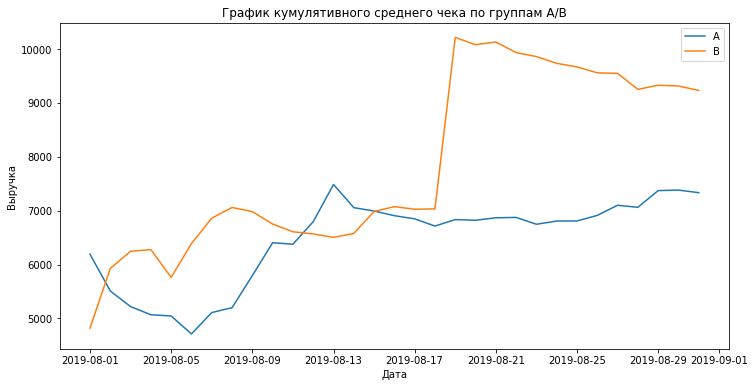

In [21]:
# Задаём размер графика 
plt.figure(figsize=(12,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам A/B')
plt.legend() 
plt.show()

Согласно графику наблюдается всё так же рост среднего чека с резкими перепадами в начале теста по обеим группам. Однако ближе к концу теста видно что обе группы стабилизируются, но грауппа А продолжает увеличивать размер среднего чека а вот группа В наоборот падает. 

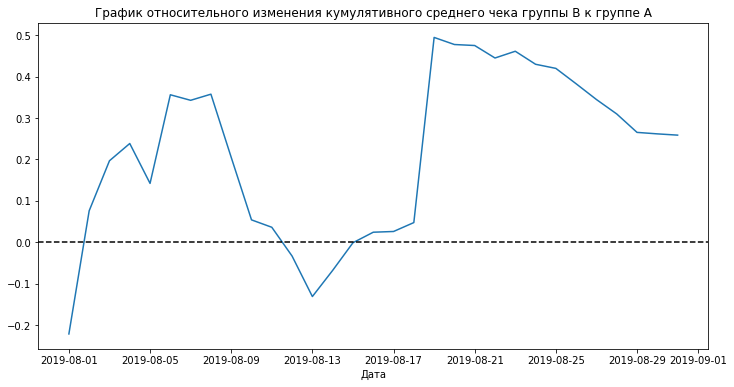

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!

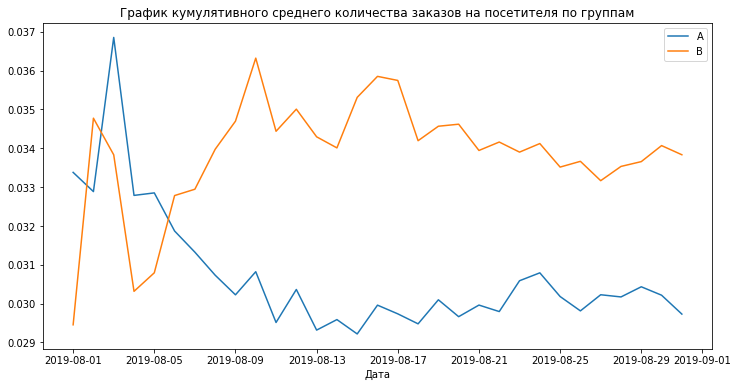

In [23]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')

# добавляем ось X
plt.xlabel('Дата')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend()
plt.show()

Среднее количество заказов относительно начала теста между группами примерно колебалось в одном диапазоне однако, далее группа В резко вырвалась вперёд и более или менее начала выравниваться к концу теста с дальнейшим предположительным ростом. Что нельзя сказать о группе А т.к. В начале теста был зафиксирован максимум кумулятивного среднего количества заказов на посетителя, но далее показатель начал стремительно падать с относительным выравниванием и дальнейшим падением к концу теста. 

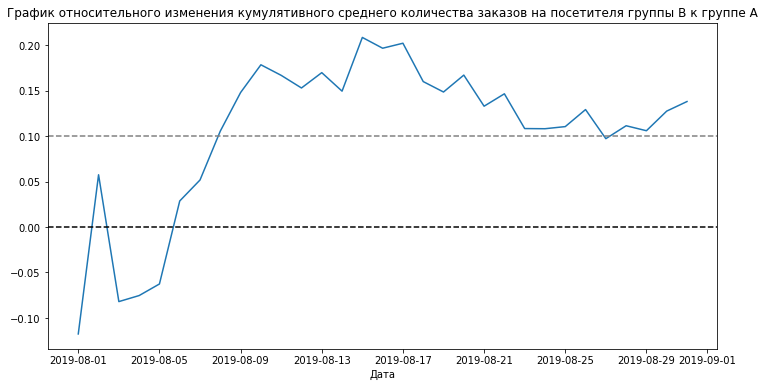

In [37]:
plt.figure(figsize=(12,6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--') 
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.show()

В начале теста группа B значительно проигрывала группе A, затем резко вырвалась вперёд.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину

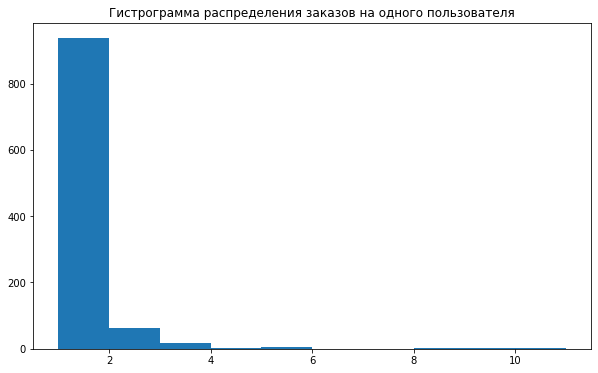

In [25]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders']
plt.figure(figsize=(10,6))
plt.hist(ordersByUsers['orders'], bins = 10)
plt.title('Гистрограмма распределения заказов на одного пользователя')
plt.show()

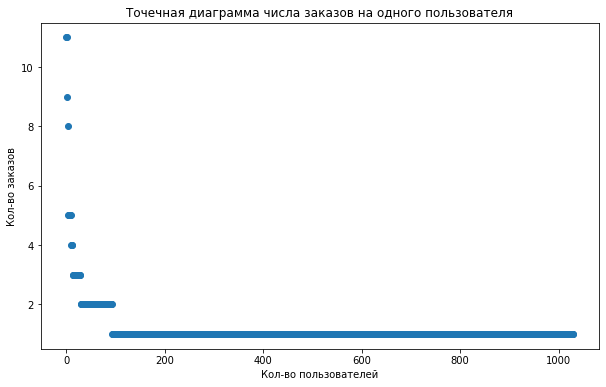

In [26]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')
plt.show()

Как и требовалось доказать. Согласно графикам Мужно заметить редких клиентов с количеством заказов более 2 и даже более 10. Как говориться выбросы очевидны. Теперь есть понимание о том какие данные следует отбросить для более точной проверки гипотез. 

In [27]:
# Считаем 95-й и 99-й перцентили количества заказов на пользователя.
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 2.0
99: 4.0


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз. 

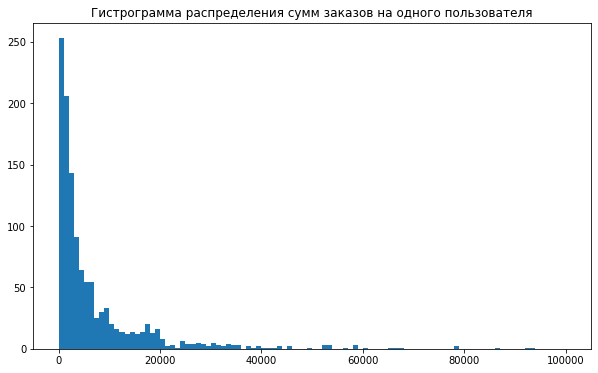

In [28]:
plt.figure(figsize=(10,6))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.show()

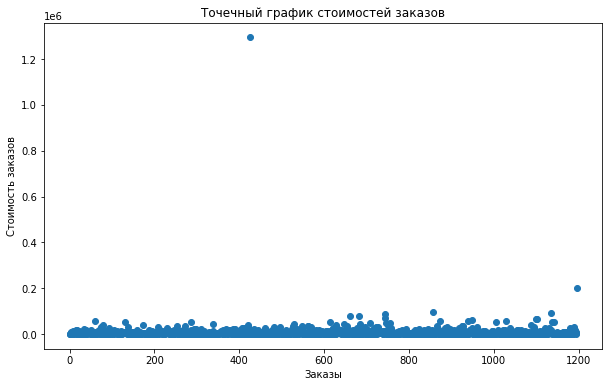

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,6))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.show()

Согласно графиков основное количество заказов оформляются до 20 тыс. и более редко свыше примерно 30 тыс. Но так же следует обратить внимание на точечный график. на нём видно что есть очень редкие заказы свыше 100 тыс. и один заказ стоимостью более 1.2 млн. 

In [30]:
# Считаем 95-й и 99-й перцентили стоимости заказов.
percentiles = np.percentile(orders['revenue'],[95, 99])
print('Перцентили:\n95: {:.0f}\n99: {:.0f}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 28000
99: 58233


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей.

Сформулируем гипотезы. 
Нулевая: различий в среднем количестве заказов между группами нет. 
Альтернативная: различия в среднем между группами есть.

Нулевая: различий в среднем чеке заказов между группами нет. 
Альтернативная: различия в среднем между группами есть.

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
alpha = .05
results = stats.mannwhitneyu(sampleA, sampleB)

print("Относительный 'выигрыш' группы B по отношению к группе A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
print('P-value: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным групп A и B разница есть')
else:
    print('По неочищенным данным различий между группами A и B нет')

Относительный 'выигрыш' группы B по отношению к группе A: 0.138
P-value: 0.017
По неочищенным данным групп A и B разница есть


p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том что, различий в среднем количестве заказов между группами нет, отвергаем. Так же и относительный проигрыш группы А равен 13.8%

In [33]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('Относительное изменение среднего чека в группе B по отношению группы A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
print('P-value: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным групп A и B разница есть')
else:
    print('По неочищенным данным различий между группами A и B нет')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.729
По неочищенным данным различий между группами A и B нет


p-value = 0.729 больше 0.05. Значит, нулевую гипотезу о том что, различий в среднем чеке заказов между группами нет, не отвергаем. В то же время относительный проигрыш группы А равен 25.9%

In [34]:
#Посчитаем количество аномальных пользователей 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество аномальных пользователей:',abnormalUsers.shape[0]) 

Количество аномальных пользователей: 74


Ранее мы выяснили что : <br>Не более 5% пользователей оформляли больше чем 2 заказа.</br><br>Не более 5% пользователей оформляли больше чем 28000 тыс.</br><br>Эти параметры мы передали отдельным выборкам что бы посмотреть на то повлияли как то эти аномальные пользователи на результат или нет.</br>

In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print("Относительный 'выигрыш' группы B по отношению к группе A после отчистки данных: {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))
print('P-value: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным групп A и B разница есть')
else:
    print('По очищенным данным различий в среднем количестве заказов между группами A и B нет')

Относительный 'выигрыш' группы B по отношению к группе A после отчистки данных: 0.173
P-value: 0.013
По очищенным данным групп A и B разница есть


p-value = 0.0130 меньше 0.05. Значит, нулевую гипотезу о том что, различий в среднем количестве заказов между группами нет, отвергаем. Однако относительный проигрыш группы А равен 17.3%.<br>По сравнению с сырыми данными результаты проверки гипотезы показали рост разницы между группами с 13 до 17 процентов.</br>

In [36]:

results = stats.mannwhitneyu(orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )

print(
    "Относительный 'выигрыш' группы B по отношению к группе A после отчистки данных: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 
print('P-value: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным групп A и B разница есть')
else:
    print('По очищенным данным различий в среднем чеке между группами A и B нет')


Относительный 'выигрыш' группы B по отношению к группе A после отчистки данных: -0.020
P-value: 0.738
По очищенным данным различий в среднем чеке между группами A и B нет


p-value = 0.738 больше 0.05. Значит, нулевую гипотезу о том что, различий в среднем чеке заказов между группами нет, не отвергаем. Однако относительный проигрыш группы B равен 25%.<br>P-value увеличился, но и разница между сегментами сократилась с 25% до 2%.Хотя общие выводы по результатам теста не изменились, данная проверка хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста.</br>

<b>Примем решение по результатам теста</b> 
<br>Варианты решений:</br>
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Есть статистически значимое различие по среднему числу заказов между группами как по сырым данным, так и после фильтрации аномалий.<br>
По сырым данным нет статистически значимого различия по среднему чеку между группами. Та же картина наблюдается и после удаления аномалий.</br>
<br>График различия по среднему числу заказов между группами сообщает, что результаты группы B лучше группы A и имеют тенденцию к росту.</br>
<br>Исходя из Фактов выше:</br>
<br>Следует остановить тест, признать его успешным и зафиксировать победу группы B.</b>